In [0]:
#importing the necessary libraries:
import numpy as np
import pandas as pd
import pystan
from scipy import stats
import matplotlib.pyplot as plt

#**Task 1:**

In [0]:

waiting_times_day = np.loadtxt('https://course-resources.minerva.kgi.edu/uploaded_files/mke/00124343-8397/call-center.csv') #Loading the call center data
current_time = 0
waiting_times_per_hour = [[] for _ in range(24)]  # Make 24 empty lists, one per hour

#adding each hour's data:
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)

waiting_times_hour_13 = waiting_times_per_hour[13] #The data for hour 13th that we are interested in.


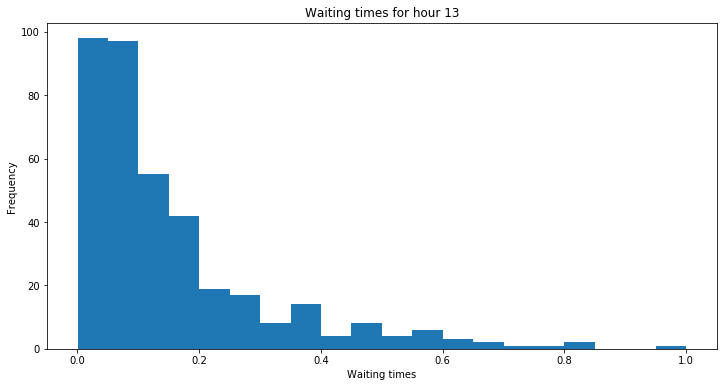

In [28]:
# Plot histogram of waiting times for hour
plt.figure(figsize=(12, 6))
plt.hist(waiting_times_hour_13, bins=20)
plt.title('Waiting times for hour 13')
plt.xlabel("Waiting times")
plt.ylabel("Frequency")
plt.show()

In [0]:
stan_code_1 = """


data {

    int<lower=1> num_calls; // Number of calls for hour 13
    real<lower=0> waiting_times[num_calls]; // waiting times for hour 13
    
    real<lower=0> alpha;  // prior hyperparameter, its value is given
    real<lower=0> beta;   // prior hyperparameter, it's value is given
    
    
}


parameters {
    real<lower=0> lambda;  //Calls rate, the only parameter in our model
     
    
}


model {
    
    lambda ~ gamma(alpha, beta); // gamma distribution prior over lambda
    
    for(i in 1:num_calls) {
        waiting_times[i] ~ exponential(lambda);  // exponential distribution likelihood  
    
    
    }
}

"""

In [5]:
stan_model_1 = pystan.StanModel(model_code=stan_code_1) #Compiling the stan code that we wrote above.

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e8808fbe6c0dbf8a3b730fdf66e17ff8 NOW.


In [0]:
#inputting the data to the stan model
stan_data_1 = {
    'num_calls': len(waiting_times_hour_13),
    'waiting_times': waiting_times_hour_13,
    'alpha':1,
    'beta':  0.25}


In [7]:
#printing the results of the stan model:
results_1 = stan_model_1.sampling(data=stan_data_1)
print(results_1.stansummary(pars=['lambda']))


Inference for Stan model: anon_model_e8808fbe6c0dbf8a3b730fdf66e17ff8.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
lambda   6.34  8.1e-3   0.32   5.76   6.12   6.33   6.55   6.99   1558    1.0

Samples were drawn using NUTS at Sat Oct 19 18:46:25 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [0]:
#Generating samples from the posterior:
samples_lambda = results_1.extract()['lambda']

In [9]:
#calculating the 98% confidence interval because the stan results above give only the 95% confidence interval:
conf_int = np.percentile(samples_lambda, [1 ,99 ])
print("Posterior 98% confidence interval over λ:", conf_int)

Posterior 98% confidence interval over λ: [5.64877767 7.14553875]


We notice that our results match the results obtained in the given notebook.

Text(0.5, 1.0, 'Histogram of posterior λ samples')

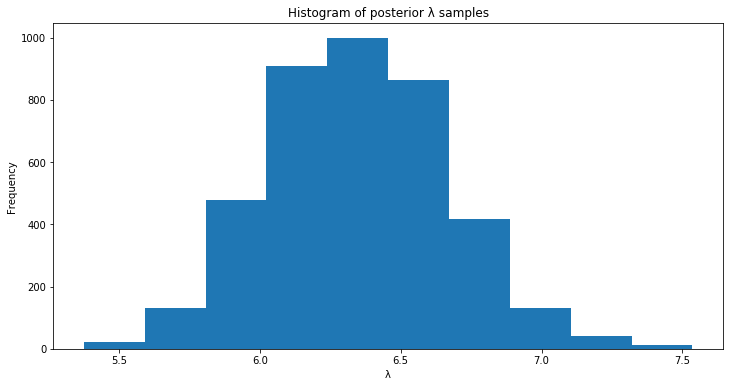

In [27]:
#plotting the histogram:
plt.figure(figsize=(12, 6))
plt.hist(samples_lambda)
plt.xlabel("λ")
plt.ylabel("Frequency")
plt.title("Histogram of posterior λ samples")


We notice that the histogram matches the pdf plot of the posterior in the given notebook

#**Task 2:**

In [0]:
#Data Given to us:
data_2 = np.array([3.54551763569501, 4.23799861761927, 4.72138425951628, -0.692265320368236, 3.04473513808788, 3.10721270732507, 3.42982225852764, 3.12153903971176, 3.60532628639808, 2.46561737557325, 1.64059465916131, 2.4621623937158, 2.76744495617481, 2.11580054750407, 5.14077208608354, 4.90288499104252, 1.43357579078348, 4.78997817363558, 1.93633438207439, 2.43698838097178, 3.95389148701877, 2.4242295507716, 2.90256268679023, 2.90931728045901, 0.658072819386888, 3.05946763895983, 3.42615331539605, 2.68842833004417, 2.35850130765166, 2.20014998540933, 4.73846511350084, 4.19839721414451, 2.11805510171691, -0.572742936038015, 0.389413982010623, 3.87846130744249, 1.34057656890858, 0.7235748351719, 5.11042369840174, 4.00747556696571, 3.18080956726965, 3.24677964069676, 5.1154659863626, 1.80276616697155, 0.305877679021404, -0.449168307882718, 4.63705561194774, 1.37783714058301, 4.9608149859515, 6.7764195802069, 1.75515522922399, 7.04457337435215, 0.625185284955128, 2.25130734369064, 2.19770178119255, 2.16858257249432, 6.25367644481438, 0.116081323476489, 2.06315857864341, 1.82409781471718, 5.15226741230987, 2.03408231293173, -1.12450854337596, 5.03511270642234, 2.03841989653263, 5.80911741751597, 2.31718128783245, 4.97575010580997, 3.34262752222776, -0.786983904253601, 0.777362359850013, 0.975825009321195, 3.76354577515958, 7.27215002907876, 1.35404089480189, 3.76567940257157, 3.48573993343334, 1.85976988586156, 1.93567061960716, 5.31071812003942, 2.96832987672751, 3.32378908637275, 2.61631960054551, 5.80897964052825, 4.95215217171488, 1.32036772796131, 3.79932542233371, 3.08108492766309, 2.6734110081666, -0.14251851138521, 2.48744375588965, 3.98463042123415, 6.32781680028, 4.0029172024315, 4.23210369459457, 1.71412938967325, 5.16492114963802, 2.53409673107906, 4.77346963973334, 3.34088878725551, 4.77681472750664, 3.81135755590976, 1.14054269983137, 1.42057452397702, 0.132142311125433, 7.12577254064672, 4.85422012781764, 4.15745720676399, 4.48763147363348, 1.56060322283629, 2.64821761542887, 1.26655351354548, 4.48497722937931, 4.3286302403783, 4.26157679512625, 4.0597558651364, 5.14051109132496, 2.5660348362221, 1.10764013818617, 0.386889523012303, 3.54150473246237, 3.57480214382351, 1.95150869584847, 2.70688970563118, 2.47971849820016, 6.50838037000679, 4.01511556826974, 1.11562740835344, 5.02637639472439, 4.38184491686864, 5.60423144047386, 2.40067408379298, 5.7849941378344, 2.37225791084559, 6.86031465910273, 4.09214858239736, 6.85994063692621, 3.62202415158781, -1.11220646958158, 3.73920971696866, 3.24533871512216, 1.28724203643002, 0.291152541773164, 0.368630935755111, 6.71607270510525, 5.42278455200833, 5.35188416119281, 2.305874586163, -1.85878097203032, 2.69877382351447, 4.84121860550417, 4.40973060799391, 5.04399320650774, 2.68632252661298, 6.06531610659912, 3.11881325011993, 3.45532087005125, 3.08442259840346, 4.43564424136733, 2.84252623135804, 1.50536798885106, 1.48868622407603, 2.07322837615663, 2.5476910210998, 5.66941808257884, 2.16731067416426, 2.49843958833905, 3.94586413879977, 0.316433764679541, -0.608937441815983, 2.5943436558557, 1.05516869528337, 2.1447601332725, 6.65846634141906, 2.1771555267834, 5.23953812029442, 3.53629759842647, 6.03263538017003, 3.85739159396599, 5.95093453004638, 1.12856987160476, 3.5559912886093, 2.21974864244489, 3.38471394882135, -1.90805399279409, 3.5113699258973, 4.49319955412346, 5.10507952638867, 1.08277895384184, 4.58403638422759, 1.37304994426824, 4.17566975753523, 3.36454182510378, 0.177136582644021, 2.91337423388405, 3.22796455457526, 2.80124198378441, 1.95189718582788, 3.37659263896246, -1.6463045238231])

mu_0_task2 = 0       
nu_0_task2 = 0.054   
alpha_0_task2 = 1.12  
beta_0_task2 = 0.4

In [0]:
stan_code_2 = """


data {

    int<lower=1> data_number; // number of data points we have
    real data_points[data_number]; // The data that we were given
    
    real mu;  // the mean of the prior
    real<lower=0> nu;   // prior hyperparameter, its value is given
    real<lower=0> alpha;  // prior hyperparameter, its value is given
    real<lower=0> beta;   // prior hyperparameter, its value is given
    
    
}


parameters {
    real x;  //mean
    real<lower=0> sigma2;  //variance
     
    
}


model {

    // Normal-inverse gamma Prior:
    sigma2 ~ inv_gamma(alpha, beta);  //inverse gamma over sigma2
    x ~ normal(mu, sqrt(sigma2/nu));  //normal over x
        
    for(i in 1:data_number) {
        data_points[i] ~ normal(x, sqrt(sigma2));  // normal likelihood function 
    
    
    }
}

"""

In [13]:
stan_model_2 = pystan.StanModel(model_code=stan_code_2) #Compiling the stan code that we wrote above.

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_594dd18ba8449ae5e01266aeea2baaee NOW.


In [0]:
#inputting the data to the stan model
stan_data_2 = {
    'data_number': len(data_2),
    'data_points': data_2,
    'mu': mu_0_task2,
    'nu': nu_0_task2,
    'alpha': alpha_0_task2,
    'beta':  beta_0_task2}


In [15]:
#printing the results of the stan model:
results_task2 = stan_model_2.sampling(data=stan_data_2)

print(results_task2.stansummary(pars=['x', 'sigma2'], probs=[0.025, 0.975]))


Inference for Stan model: anon_model_594dd18ba8449ae5e01266aeea2baaee.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%  97.5%  n_eff   Rhat
x        3.07  2.3e-3   0.13    2.8   3.33   3383    1.0
sigma2   3.61  6.4e-3   0.36   2.99   4.38   3146    1.0

Samples were drawn using NUTS at Sat Oct 19 18:47:31 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


We can see how the 95% confidence interval of x [2.8, 3.33] and of sigma2 [2.99, 4.38] match the results obtained in the given notebook 

In [0]:
#Extracting 10 samples:
x_samples = results_task2.extract()['x'][:10]
sigma2_samples = results_task2.extract()['sigma2'][:10]

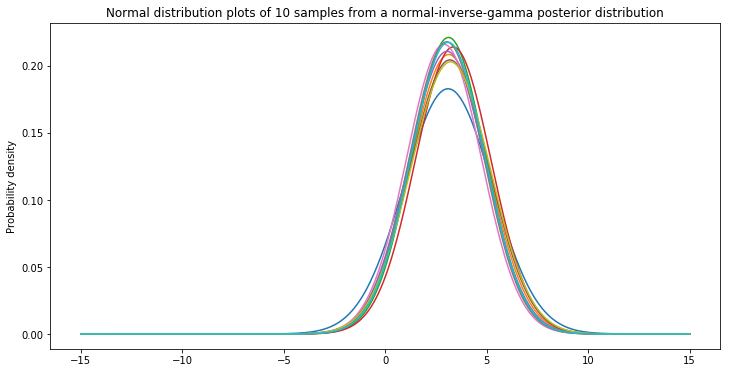

In [17]:
#plotting normal distribution with the 10 samples we extracted:
plt.figure(figsize=(12, 6))
plot_x = np.linspace(-15, 15, 500)
for i in range(len(x_samples)):
    plot_y = stats.norm.pdf(plot_x, loc=x_samples[i], scale=np.sqrt(sigma2_samples[i]))
    plt.plot(plot_x, plot_y)
plt.title("Normal distribution plots of 10 samples from a normal-inverse-gamma posterior distribution")
plt.ylabel("Probability density")
plt.show()

#**Task 3:**

In [18]:
#data given:
mu_0_hrtem = 2.3
nu_0_hrtem = 0.1
alpha_0_hrtem = 2
beta_0_hrtem = 5

hrtem_data = np.loadtxt('https://course-resources.minerva.kgi.edu/uploaded_files/mke/00075398-1635/hrtem.csv')
print('%i data, min: %f, max: %f' % (len(hrtem_data), min(hrtem_data), max(hrtem_data)))

500 data, min: 1.051827, max: 28.942578


In [0]:
#log transforming the data:
log_hrtem_data = np.log(hrtem_data)

In [0]:
stan_code_3 = """


data {

    int<lower=1> data_number; // number of data points we have
    real<lower=0> data_points[data_number]; // The log data that we were given
    
    real mu;  // prior hyperparameter, its value is given
    real<lower=0> nu;   // prior hyperparameter, its value is given
    real<lower=0> alpha;  // prior hyperparameter, its value is given
    real<lower=0> beta;   // prior hyperparameter, its value is given
    
    
}


parameters {
    real x;  //mean
    real<lower=0> sigma2;  //variance
     
    
}


model {

    // Normal-inverse gamma Prior:
    sigma2 ~ inv_gamma(alpha, beta);  //inverse gamma over sigma2
    x ~ normal(mu, sqrt(sigma2/nu));  //normal over x
        
    for(i in 1:data_number) {
        data_points[i] ~ normal(x, sqrt(sigma2));  // normal likelihood function 
    
    
    }
}

"""

In [21]:
stan_model_3 = pystan.StanModel(model_code=stan_code_3) #Compiling the stan code that we wrote above.

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c85f58a4aa9d6df720f6257fa0ae36f6 NOW.


In [0]:
#inputting the data to the stan model
stan_data_3 = {
    'data_number': len(log_hrtem_data),
    'data_points': log_hrtem_data,
    'mu': mu_0_hrtem,
    'nu': nu_0_hrtem,
    'alpha': alpha_0_hrtem,
    'beta':  beta_0_hrtem}


In [23]:
#printing the results of the stan model:
results_hrtem = stan_model_3.sampling(data=stan_data_3)
print(results_hrtem.stansummary(pars=['x', 'sigma2'], probs=[0.025, 0.975]))


Inference for Stan model: anon_model_c85f58a4aa9d6df720f6257fa0ae36f6.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%  97.5%  n_eff   Rhat
x        1.89  4.9e-4   0.03   1.83   1.95   4056    1.0
sigma2    0.5  5.1e-4   0.03   0.44   0.56   3856    1.0

Samples were drawn using NUTS at Sat Oct 19 18:48:38 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


We can see how the 95% confidence interval of x [1.83, 1.95] and of sigma2 [0.44, 0.56] match the results obtained in the given notebook 

In [0]:
#taking 10 samples:
x_samples_hrtem = results_hrtem.extract()['x'][:10]
sigma2_samples_hrtem = results_hrtem.extract()['sigma2'][:10]


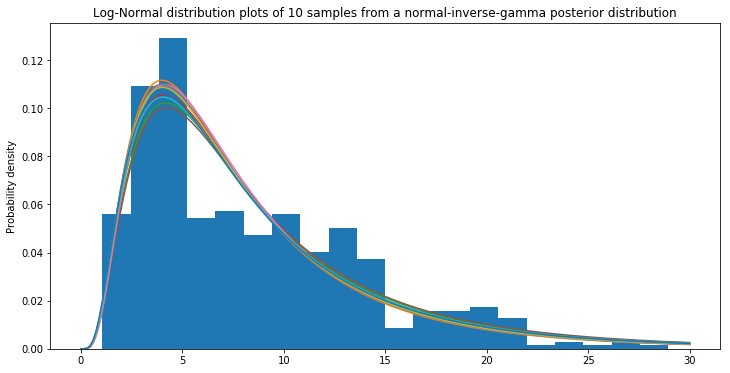

In [26]:
#plotting the log-normal distribution using the 10 samples:
plt.figure(figsize=(12, 6))
plt.hist(hrtem_data, bins=20, density=True)
plot_x = np.linspace(0, 30, 200)
for i in range(len(x_samples_hrtem)):
    plot_y = stats.lognorm.pdf(plot_x,  np.sqrt(sigma2_samples_hrtem[i]), scale=np.exp(x_samples_hrtem[i])) 
    plt.plot(plot_x, plot_y)
plt.title("Log-Normal distribution plots of 10 samples from a normal-inverse-gamma posterior distribution")
plt.ylabel("Probability density")
plt.show()